In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import ast
import os


### Ultima epoch para cada Fase

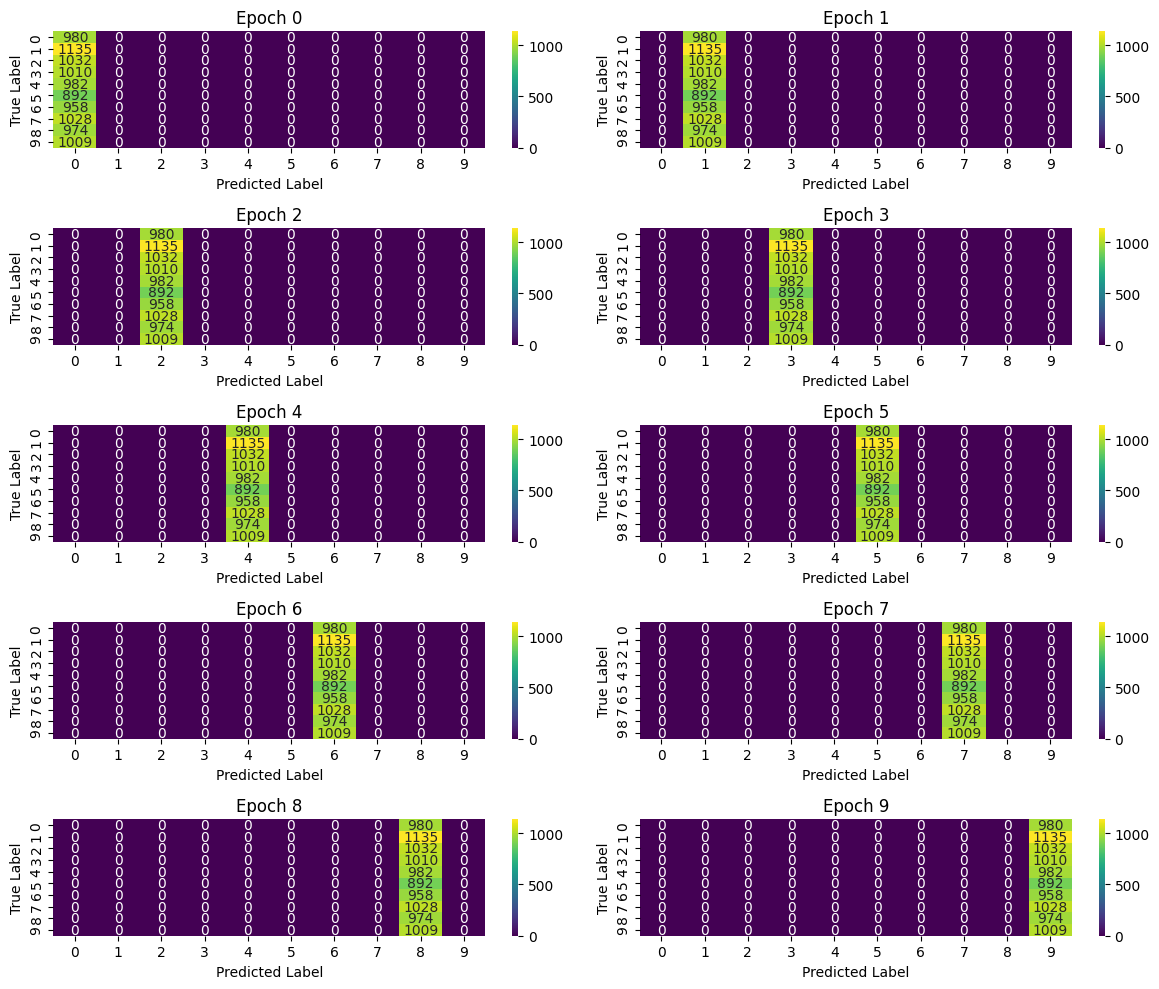

In [9]:

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))

# Iterar sobre los archivos y las ubicaciones de subgráficos
for i, ax in enumerate(axes.flatten()):
    # Crear el nombre del archivo
    file_name = f'logs/epoch_9_CC_{i}.txt'
    
    # Verificar si el archivo existe
    if os.path.exists(file_name):
        # Abre el archivo en modo de lectura ('r')
        with open(file_name, 'r') as archivo:
            # Lee el contenido del archivo
            contenido = archivo.read()
            
            # Convierte la expresión literal de Python en la estructura de datos original
            data = ast.literal_eval(contenido)

        # Extraer etiquetas reales y predicciones
        real_labels, predicted_labels = zip(*data)

        # Crear una matriz de confusión
        conf_matrix = confusion_matrix(real_labels, predicted_labels)

        # Crear un mapa de calor en el subgráfico actual
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                    xticklabels=set(real_labels), yticklabels=set(real_labels), ax=ax)

        # Añadir etiquetas a los ejes
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Epoch {i}')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


### Analisis

- Podemos ver que pierde totalmente la capacidad de predecir. Pero seria interesante saber si el modelo aún tiene la capacidad de separarlos en el espacio latente.

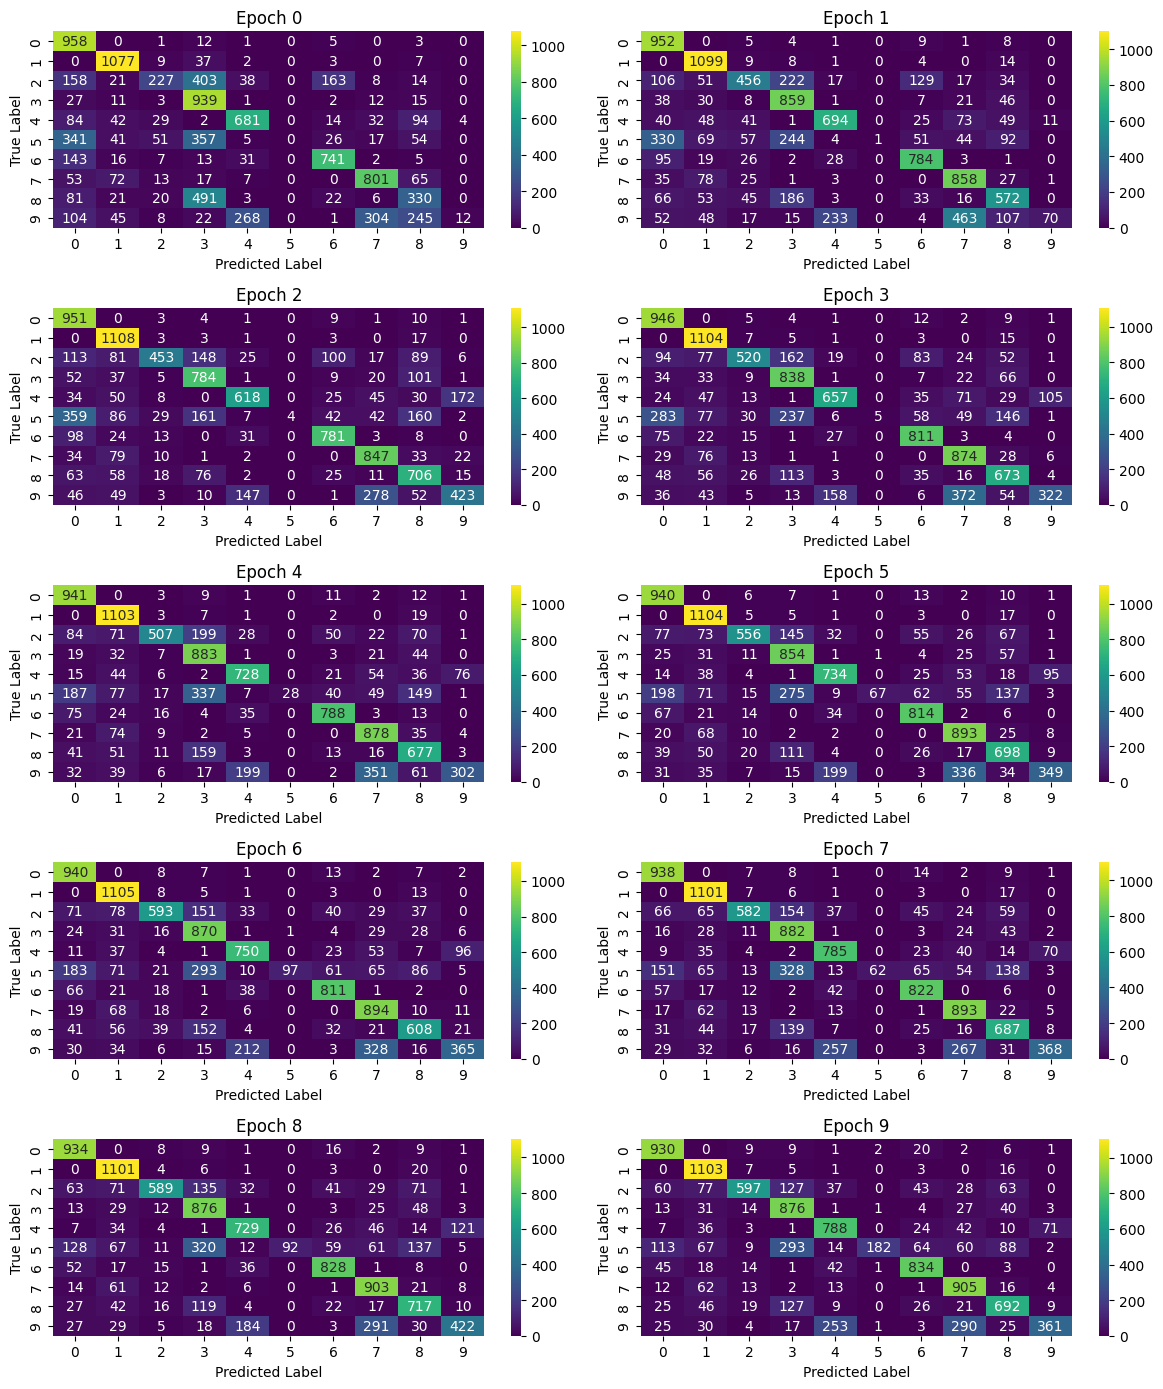

In [14]:

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))

# Iterar sobre los archivos y las ubicaciones de subgráficos
for i, ax in enumerate(axes.flatten()):
    # Crear el nombre del archivo
    file_name = f'logs/epoch_{i}_Tuning.txt'
    
    # Verificar si el archivo existe
    if os.path.exists(file_name):
        # Abre el archivo en modo de lectura ('r')
        with open(file_name, 'r') as archivo:
            # Lee el contenido del archivo
            contenido = archivo.read()
            
            # Convierte la expresión literal de Python en la estructura de datos original
            data = ast.literal_eval(contenido)

        # Extraer etiquetas reales y predicciones
        real_labels, predicted_labels = zip(*data)

        # Crear una matriz de confusión
        conf_matrix = confusion_matrix(real_labels, predicted_labels)

        # Crear un mapa de calor en el subgráfico actual
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
                    xticklabels=set(real_labels), yticklabels=set(real_labels), ax=ax)

        # Añadir etiquetas a los ejes
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Epoch {i}')

# Ajustar diseño y mostrar el mosaico de mapas de calor
plt.tight_layout()
plt.show()


- Aquí podemos ver que puede clasificar una clase que nunca ha visto. Probablemente sea porque se esta apoyando de lo aprendido de la clase 4.

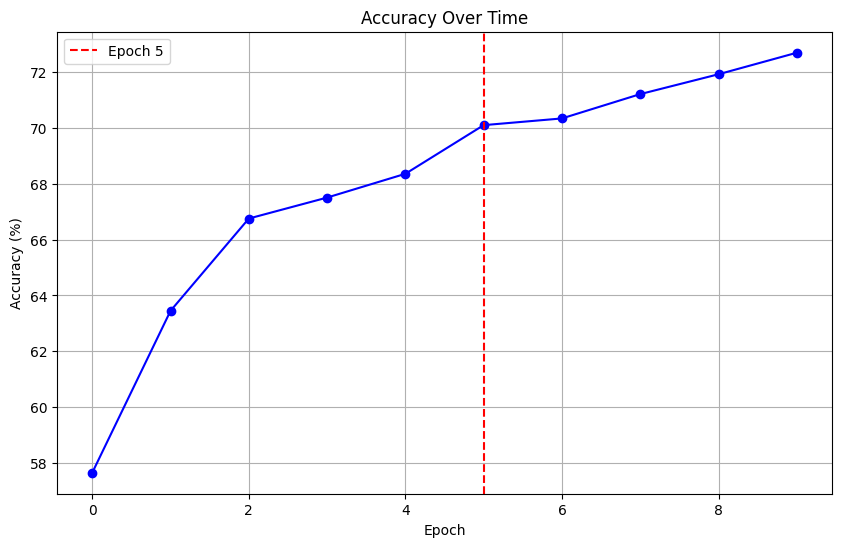

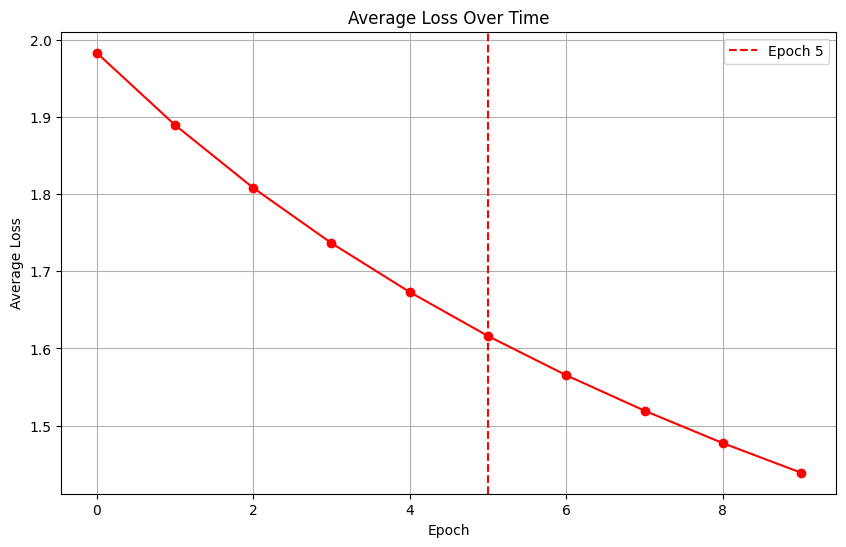

In [15]:
import matplotlib.pyplot as plt

# Abrir y leer el archivo
with open('logs/log_accuracy_loss_Tuning.txt', 'r') as file:
    accuracy_loss_list = eval(file.read())

# Desempaquetar la lista en dos listas separadas
accuracies, avg_losses = zip(*accuracy_loss_list)

# Graficar la precisión (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
# Añadir línea vertical en la epoch 24
plt.axvline(x=5, color='r', linestyle='--', label='Epoch 5'); plt.legend()
plt.show()

# Graficar la pérdida promedio (avg loss)
plt.figure(figsize=(10, 6))
plt.plot(avg_losses, marker='o', linestyle='-', color='r')
plt.title('Average Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)

# Añadir línea vertical en la epoch 24
plt.axvline(x=5, color='r', linestyle='--', label='Epoch 5'); plt.legend()

plt.show()
